# Fig4-dye_bacteria_heartbeat

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from glob import glob
import matplotlib as mpl
from skimage.io import imread
from diptericin_paper_utils import colors, dpt, standard_ap, fb_start_id, style_axes, rc_params, fontsize, linewidth
import pickle

In [5]:
#%matplotlib qt
%matplotlib inline

In [6]:
"""plot style"""
mpl.rcParams.update(rc_params)

def style_axes(ax, fontsize=24):
    plt.minorticks_off()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    #plt.tight_layout()
    
    return ax


In [10]:
def bin_aps(df, bins, ap_col='y'):
    _counts, bins = np.histogram(df.get(ap_col), bins)
    bins = bins[1:]
    partial_func = partial(get_ap_bin, bins=bins)
    binned_aps = df.get(ap_col).apply(partial_func)
    df[f'binned_{ap_col}'] = binned_aps.values
    
    return df

def get_ap_bin(this_ap, bins):
    this_bin = np.where(np.abs(this_ap - bins) == np.nanmin(np.abs(this_ap - bins)))[0][0]

    return this_bin

In [7]:
"""insert path to the folder of all data files here"""
path_to_supplemental_data_files = r'/home/brandon/Documents/Code/diptericin-paper/SupplementalDataFiles_revision'

# Fig. 4
Anterior-posterior distributions of various quantities with and without a heartbeat. All graph panels are plotted together and edited in post.

In [8]:
# bacteria yes heartbeat
with open(path_to_supplemental_data_files + '/Fig4/bacteria_yes_hb_planktonic_dens_arr.pkl', 'rb') as f:
    bac_yes_hb = pickle.load(f)
    
# bacteria no heartbeat
with open(path_to_supplemental_data_files + '/Fig4/bacteria_no_hb_planktonic_dens_arr.pkl', 'rb') as f:
    bac_no_hb = pickle.load(f)
    
# dye yes heartbeat
with open(path_to_supplemental_data_files + '/Fig4/all_dye_dists_yes_hb.pkl', 'rb') as f:
    dye_yes_hb = pickle.load(f)
    
# dye no heartbeat
with open(path_to_supplemental_data_files + '/Fig4/all_dye_dists_no_hb.pkl', 'rb') as f:
    dye_no_hb = pickle.load(f)
    
# dptA yes heartbeat
with open(path_to_supplemental_data_files + '/Fig4/dptA_yes_hb_ap_dists.pkl', 'rb') as f:
    dpt_yes_hb = pickle.load(f)
    
# dptA no heartbeat
with open(path_to_supplemental_data_files + '/Fig4/dptA_no_hb_ap_dists.pkl', 'rb') as f:
    dpt_no_hb = pickle.load(f)
    
all_dist_arrs = [bac_yes_hb, bac_no_hb, dye_yes_hb, dye_no_hb, dpt_yes_hb, dpt_no_hb]

4
4
5
5
5
5


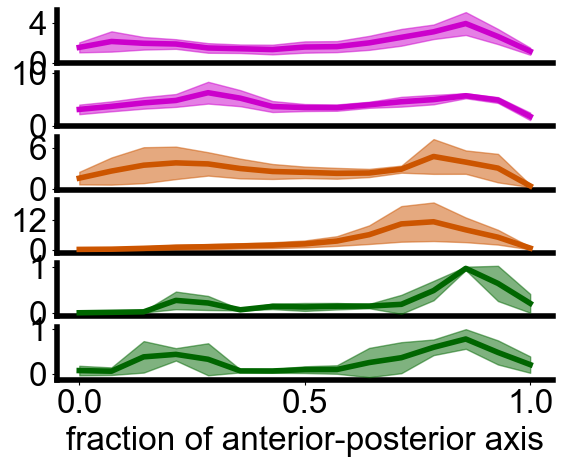

In [10]:
plt.figure()
plot_colors = [colors['bacteria'], colors['bacteria'], colors['dye'], colors['dye'], colors['e.coli'], colors['e.coli']]
ylabels = ['planktonic \nbacteria density \n($10^7$ cells / ml)',
            'planktonic \nbacteria density \n($10^7$ cells / ml)', 
           'rhodamine \nfluorescence \nintensity (a.u.)', 
           'rhodamine \nfluorescence \nintensity (a.u.)', 
          f'normalized {dpt}-GFP \nfluorescence \nintensity (a.u.)',
          f'normalized {dpt}-GFP \nfluorescence \nintensity (a.u.)']
yticks = [[0, 4], [0, 10], [0, 6], [0, 12], [0, 1], [0,1]]
for i in range(len(all_dist_arrs)):
    print(len(all_dist_arrs[i]))
    color = plot_colors[i]
    plt.subplot(6, 1, i+1)
    this_dist_arr = all_dist_arrs[i]
    m = np.mean(this_dist_arr, axis=0)
    s = np.std(this_dist_arr, axis=0)
    l = m - s
    u = m + s
    x = standard_ap[:-1]
    plt.fill_between(x, l, u, color=color, alpha=0.5, zorder=100)
    plt.plot(x, m, color=color, linewidth=4, zorder=102)
    #plt.ylabel(ylabels[i], fontsize=fontsize)
    plt.xticks([])
    plt.yticks(yticks[i])
    ax = style_axes(plt.gca())

plt.xlabel('fraction of anterior-posterior axis', fontsize=fontsize)
plt.xticks([0, 0.5, 1.0])
ax = style_axes(plt.gca())


In [10]:
#plt.savefig(r'/home/brandon/Documents/Code/diptericin-paper/figures/combined_bac-dye-hb_fig/6panel_ap_dists_v2.pdf')

# Code for creating these 1D distributions

## Fig. 4A, C
dye distributions

In [17]:
"""paths to the image directories. making these publically available is in progress. toggle these different lines of code for with and without heartbeats."""
#dye_experiment_paths = [r'/media/brandon/Data1/Brandon/fly_immune/bb8/2024_06_27_NP1029-gal4_rhodamine/5min_exp30ms_power100_mag29pt5', '/media/brandon/Data1/Brandon/fly_immune/bb8/2024_07_05_NP1029-gal4_rhodamine/5min_exp30ms_power100_mag29pt5']
dye_experiment_paths = [r'/media/brandon/Data1/Brandon/fly_immune/bb8/2024_07_05_NP1029-gal4_UAS-Mhc_RNAi_rhodamine/5min_exp30ms_power100_mag29pt5']

In [18]:
"""assemble the dye distributions"""
all_dye_dists = []
larva_thresh = 2000
#n_ap_bins = 30
counter = 0
for path in dye_experiment_paths:
    larvae_dirs = sorted(glob(path + '/larva*'))
    for larvae_dir in larvae_dirs:
        file = glob(larvae_dir + '/Pos0/*.tif')
        if len(file) > 1:
            print(f'more than 1 tif in {larvae_dir}/Pos0')
            continue
        im = imread(file[0])
        im[im < larva_thresh] = 0
        this_dist = np.sum(im, axis=1)
        larva_mask = np.sum(im > 0, axis=1)
        first_id = np.where(larva_mask)[0][0]
        last_id = np.where(larva_mask)[0][-1]
        this_dist = this_dist[first_id:last_id]
        tmp_df = pd.DataFrame()
        tmp_df['y'] = np.arange(len(this_dist))
        tmp_df['ap'] = tmp_df['y'] / np.max(tmp_df['y'])
        tmp_df['inten'] = this_dist
        tmp_df = bin_aps(tmp_df, ap_bins, ap_col='ap')
        tmp_df = tmp_df.groupby(by='binned_ap').sum()
        
        all_dye_dists.append(tmp_df.inten.values)

all_dye_dists_arr = np.zeros((len(all_dye_dists), len(all_dye_dists[0])))
for i in range(len(all_dye_dists)):
    all_dye_dists_arr[i] = all_dye_dists[i]
    
all_dye_dists_arr /= 1e7

In [23]:
all_dye_dists_arr[0]

array([0.0377456, 0.0231529, 0.0314229, 0.0893805, 0.1233437, 0.0674946,
       0.018516 , 0.0213865, 0.0030555, 0.       , 0.       , 0.       ,
       0.       , 0.       , 0.0031202])

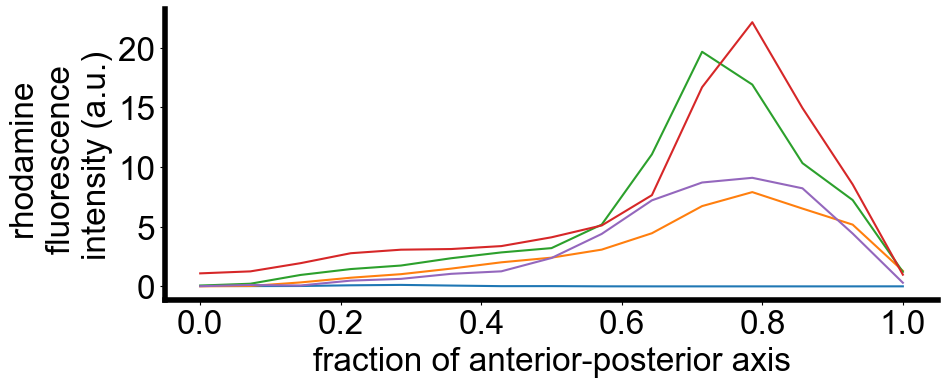

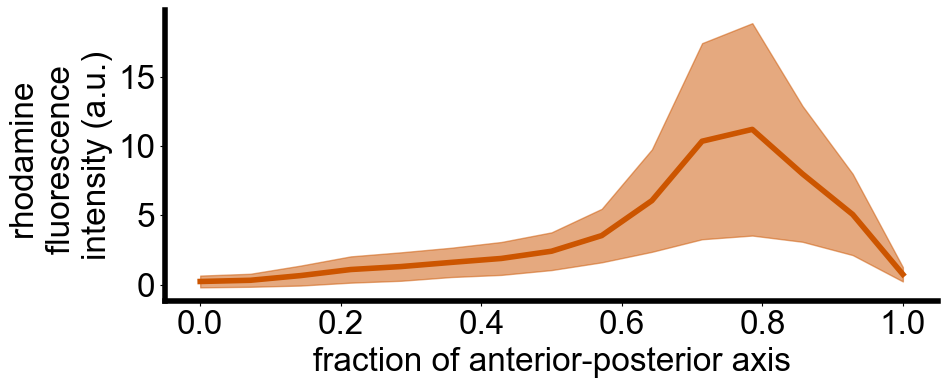

In [27]:
plt.figure(figsize=(10,4.4))
for dd in all_dye_dists:
    x = standard_ap[:-1]
    plt.plot(x, dd / 1e7)
plt.xlabel('fraction of anterior-posterior axis', fontsize=24)
plt.ylabel('rhodamine \nfluorescence \nintensity (a.u.)', fontsize=24)
ax = style_axes(plt.gca())    

plt.figure(figsize=(10,4.4))
color = np.array([204., 85., 0.]) / 255
m = np.mean(all_dye_dists_arr, axis=0)
s = np.std(all_dye_dists_arr, axis=0)
l = m - s
u = m + s
x = standard_ap[:-1]
plt.fill_between(x, l, u, color=color, alpha=0.5, zorder=100)
plt.plot(x, m, color=color, linewidth=4, zorder=102)
plt.xlabel('fraction of anterior-posterior axis', fontsize=24)
plt.ylabel('rhodamine \nfluorescence \nintensity (a.u.)', fontsize=24)
ax = style_axes(plt.gca())


## Fig. 4E,G 
bacterial density

In [3]:
"""params"""
method = 'bkg_sub_sum_data'

n_ap_bins = len(standard_ap) - 1
ap_bins = np.linspace(0, 1, n_ap_bins + 1)
ap = standard_ap

available_volume = np.array([27703642.15683365, 38625096.27772312, 49005364.65414026,
       54661570.17747132, 59399710.6976377 , 61620965.45337785,
       62897005.41944133, 66498877.09669854, 65965936.8429447 ,
       68408412.0813751 , 66640659.31515007, 66279667.70930545,
       65485285.06691763, 64243433.72090626, 62716006.84269474,
       59620931.180328  , 58000993.91844597, 50990315.71246126,
       46851481.59085581, 39738237.52471466, 30081963.45528388,
       20836556.15506787])

x = np.linspace(0, 1, n_ap_bins)
xp = np.linspace(0, 1, len(available_volume))
sampled_volume = np.interp(x, xp, available_volume)
sampled_volume = np.flip(sampled_volume)

all_ap_dists = np.zeros((4, n_ap_bins))
all_ap_dens = np.zeros((4, n_ap_bins))



### Fig. 4E
bacteria with heartbeat

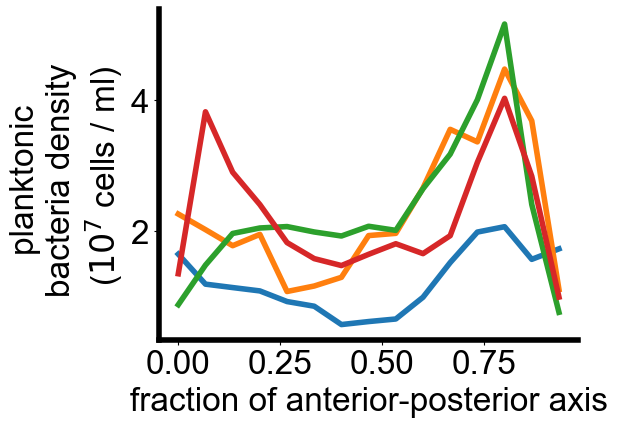

In [13]:
"""assemble the 1D profiles of bacterial density and plot the individual profiles"""
counter = 0
max_cells = 2#None
files = glob(path_to_supplemental_data_files + '/Fig4/bacterial_segmentation_results/bacteria_yes_heartbeat/*.pkl')
plt.figure()
for file in files:
    df = pd.read_pickle(file)
    func = lambda row: row.data[0].size
    sizes = df.apply(func, axis=1)
    df = df[sizes < 1e5]
    q_min, q_max = np.quantile(df.y.values, q=[0.001, 0.999])

    df['ap'] = (q_max - df.y + q_min) / q_max

    df = bin_aps(df, ap_bins, ap_col='ap')
    ap_col = 'ap'

    intens = df.get(method)
    single_cell_inten = np.median(intens)
    df['n_bacteria'] = np.clip(intens / single_cell_inten, a_min=1, a_max=np.inf).astype('int')

    """filter bacterial clusters by size"""
    if max_cells is not None:
        df = df[df.n_bacteria <= max_cells]


    """plot number of bacteria vs ap axis"""
    binned_sum = df.get(['n_bacteria', f'binned_{ap_col}']).groupby(by=f'binned_{ap_col}').sum().values.flatten()
    ap_bin_numbers = sorted(df.get(f'binned_{ap_col}').unique())
    binned_concentration = binned_sum / sampled_volume[ap_bin_numbers] * 1e12 / 1e7
    all_ap_dists[counter, ap_bin_numbers] = binned_sum
    all_ap_dens[counter, ap_bin_numbers] = binned_concentration 
    plt.plot(ap_bins[ap_bin_numbers], binned_concentration, linewidth=linewidth)

    counter += 1
       
plt.xlabel('fraction of anterior-posterior axis', fontsize=fontsize)
plt.ylabel('planktonic \nbacteria density \n($10^7$ cells / ml)', fontsize=fontsize)
ax = style_axes(plt.gca(), fontsize=fontsize)
plt.tight_layout()


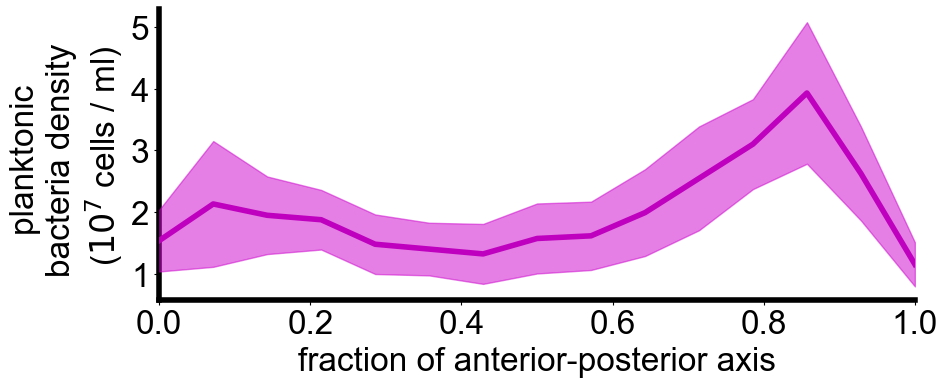

In [14]:
"""plot the mean and standard deviation"""
plt.figure(figsize=(10,4.4))

m = np.mean(all_ap_dens, axis=0)
s = np.std(all_ap_dens, axis=0)
u = m + s
l = m - s
plt.fill_between(ap[:-1], l, u, color=colors['bacteria'], alpha=0.5, zorder=100)
plt.plot(ap[:-1], m, 'm-', linewidth=4, zorder=102)
plt.xlabel('fraction of anterior-posterior axis', fontsize=24)
plt.ylabel('planktonic \nbacteria density \n($10^7$ cells / ml)', fontsize=24)

plt.xlim([0, 1])
ax = style_axes(plt.gca())

### Fig. 4G
bacteria without heartbeat

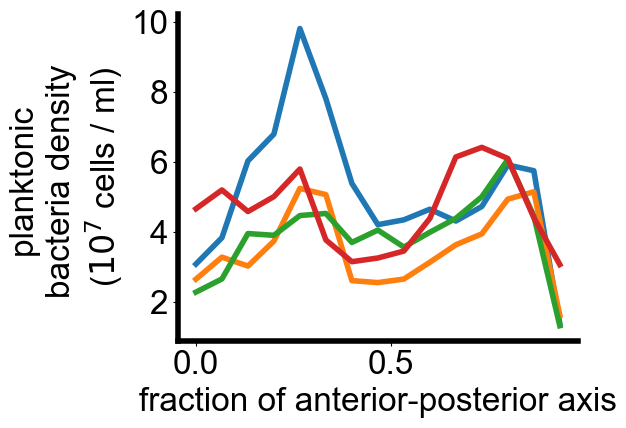

In [15]:
"""assemble the 1D profiles of bacterial density and plot the individual profiles"""
counter = 0
max_cells = 2#None
files = glob(path_to_supplemental_data_files + '/Fig4/bacterial_segmentation_results/bacteria_no_heartbeat/*.pkl')
plt.figure()
for file in files:
    df = pd.read_pickle(file)
    func = lambda row: row.data[0].size
    sizes = df.apply(func, axis=1)
    df = df[sizes < 1e5]
    q_min, q_max = np.quantile(df.y.values, q=[0.001, 0.999])

    df['ap'] = (q_max - df.y + q_min) / q_max

    df = bin_aps(df, ap_bins, ap_col='ap')
    ap_col = 'ap'

    intens = df.get(method)
    single_cell_inten = np.median(intens)
    df['n_bacteria'] = np.clip(intens / single_cell_inten, a_min=1, a_max=np.inf).astype('int')

    """filter bacterial clusters by size"""
    if max_cells is not None:
        df = df[df.n_bacteria <= max_cells]


    """plot number of bacteria vs ap axis"""
    binned_sum = df.get(['n_bacteria', f'binned_{ap_col}']).groupby(by=f'binned_{ap_col}').sum().values.flatten()
    ap_bin_numbers = sorted(df.get(f'binned_{ap_col}').unique())
    binned_concentration = binned_sum / sampled_volume[ap_bin_numbers] * 1e12 / 1e7
    all_ap_dists[counter, ap_bin_numbers] = binned_sum
    all_ap_dens[counter, ap_bin_numbers] = binned_concentration 
    plt.plot(ap_bins[ap_bin_numbers], binned_concentration, linewidth=linewidth)

    counter += 1
       
plt.xlabel('fraction of anterior-posterior axis', fontsize=fontsize)
plt.ylabel('planktonic \nbacteria density \n($10^7$ cells / ml)', fontsize=fontsize)
ax = style_axes(plt.gca(), fontsize=fontsize)
plt.tight_layout()


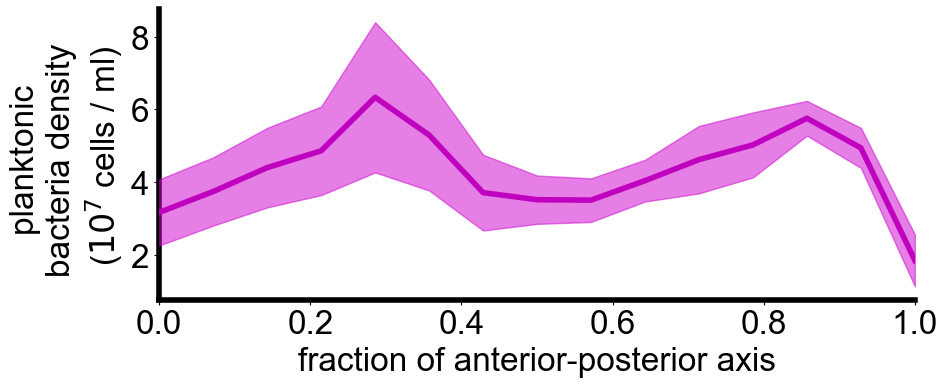

In [16]:
"""plot the mean and standard deviation"""
plt.figure(figsize=(10,4.4))

m = np.mean(all_ap_dens, axis=0)
s = np.std(all_ap_dens, axis=0)
u = m + s
l = m - s
plt.fill_between(ap[:-1], l, u, color=colors['bacteria'], alpha=0.5, zorder=100)
plt.plot(ap[:-1], m, 'm-', linewidth=4, zorder=102)
plt.xlabel('fraction of anterior-posterior axis', fontsize=24)
plt.ylabel('planktonic \nbacteria density \n($10^7$ cells / ml)', fontsize=24)

plt.xlim([0, 1])
ax = style_axes(plt.gca())